In [1]:
# import tools

import cv2
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np 

In [5]:
# load battery image

btr = cv2.imread('data/images/sample_image.png')

btr_rgb = cv2.cvtColor(btr,cv2.COLOR_BGR2RGB)
btr_gry = cv2.cvtColor(btr,cv2.COLOR_BGR2GRAY)
threshold, btr_thr = cv2.threshold(btr_gry,150,255,cv2.THRESH_BINARY)

wb,hb,cb = btr.shape
btr_blank = np.zeros((wb,hb,cb),np.uint8) 
btr_blank1 = np.zeros_like(btr,np.uint8) # same as above

In [6]:
# find the contours of the can and display

contours_can,hierarchy = cv2.findContours(btr_thr,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

contours_can = sorted(contours_can, key=cv2.contourArea, reverse=True)

# declare the variables of the inner and outer diameter of the can

otr, inn = contours_can[0], contours_can[1]

(1340, 1340) (1340, 1340) (1340, 1340)


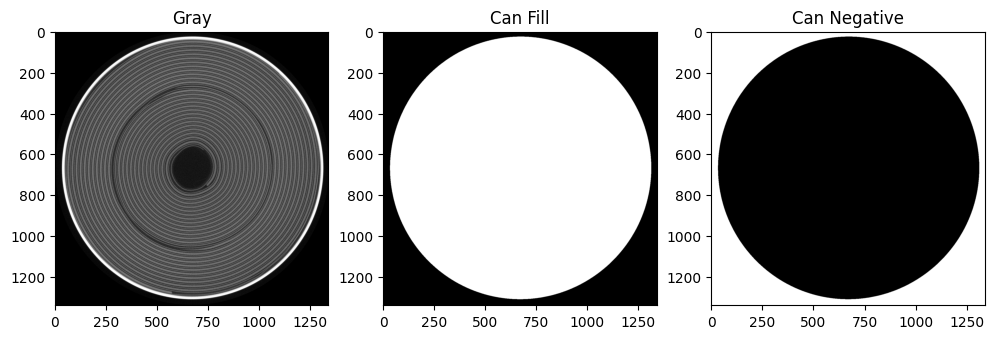

In [7]:
# apply negative and postive masks 

btr_cn_fll = np.zeros_like(btr_gry, np.uint8)

cv2.drawContours(btr_cn_fll,[otr],0,(255),-1)

btr_cn_ngt = cv2.bitwise_not(btr_cn_fll)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("Gray")
plt.imshow(btr_gry, cmap="gray")

plt.subplot(1,3,2)
plt.title("Can Fill")
plt.imshow(btr_cn_fll, cmap='gray')

plt.subplot(1,3,3)
plt.title("Can Negative")
plt.imshow(btr_cn_ngt, cmap='gray')

print(btr_gry.shape, btr_cn_fll.shape, btr_cn_ngt.shape)


(1340, 1340, 3) (1340, 1340, 3) (1340, 1340, 3)
(1851, 1, 2)


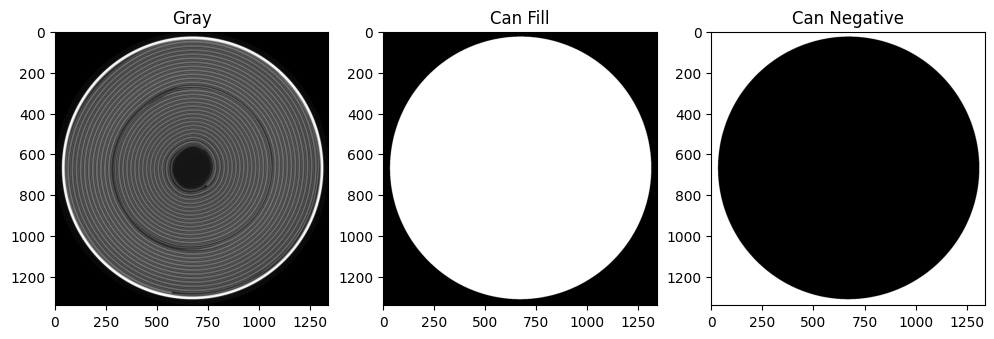

In [8]:
# create postive mask with polyFill instead

btr_cn_fll2 = np.zeros_like(btr)

# reshape contour into multiple contours
otr2 = otr.reshape((-1, 1, 2))  

cv2.fillPoly(btr_cn_fll2, [otr2], (255, 255, 255))  # Specify the color if needed

btr_cn_ngt2 = cv2.bitwise_not(btr_cn_fll2)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("Gray")
plt.imshow(btr)

plt.subplot(1,3,2)
plt.title("Can Fill")
plt.imshow(btr_cn_fll2)

plt.subplot(1,3,3)
plt.title("Can Negative")
plt.imshow(btr_cn_ngt2)

print(btr.shape, btr_cn_fll2.shape, btr_cn_ngt2.shape)
print(otr.shape)


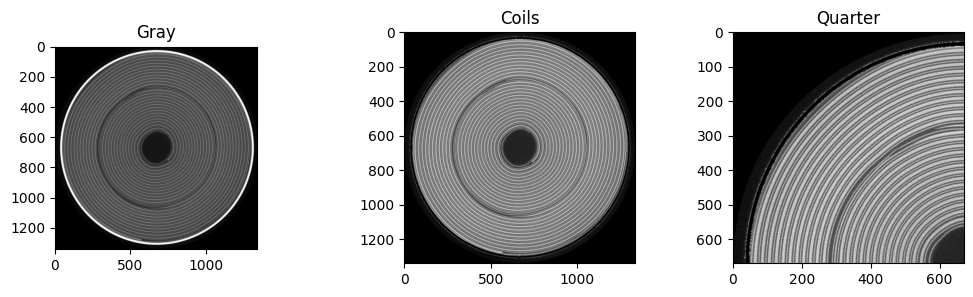

In [10]:
# apply mask to select for coils alone

btr_thr_blr = cv2.GaussianBlur(btr_thr, (5,5), cv2.BORDER_DEFAULT)
btr_cn_nt = cv2.bitwise_not(btr_thr_blr)
btr_cl = cv2.bitwise_and(btr_gry,btr_cn_nt)

rows = hb//2
cols = wb//2

btr_cl_slc = btr_cl[0:rows,0:cols]

plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.title("Gray")
plt.imshow(btr_gry, cmap="gray")

plt.subplot(1,3,2)
plt.title("Coils")
plt.imshow(btr_cl, cmap='gray')

plt.subplot(1,3,3)
plt.title("Quarter")
plt.imshow(btr_cl_slc, cmap='gray')

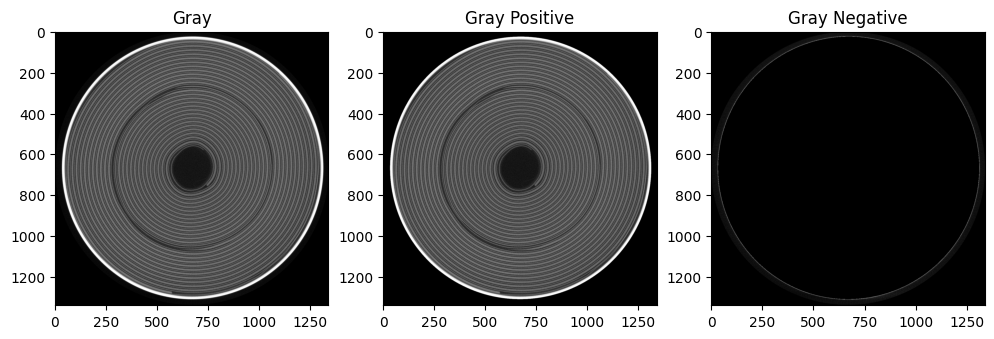

In [9]:
# use masks to remove background or the cell itself

btr_gry_pst = cv2.bitwise_and(btr_gry,btr_gry, mask=btr_cn_fll)

btr_gry_ngt = cv2.bitwise_and(btr_gry,btr_gry, mask=btr_cn_ngt)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.title("Gray")
plt.imshow(btr_gry, cmap="gray")

plt.subplot(1,3,2)
plt.title("Gray Positive")
plt.imshow(btr_gry_pst, cmap='gray')

plt.subplot(1,3,3)
plt.title("Gray Negative")
plt.imshow(btr_gry_ngt, cmap='gray')
